In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
df = pd.read_csv('../dataset/house-prices-advanced-regression-techniques/train.csv')
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [198]:
X, y = np.array(df['YearBuilt']), np.array(df['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1022,) (438,)
(1022,) (438,)


[ 6.17446393e+02 -1.03575205e+06]


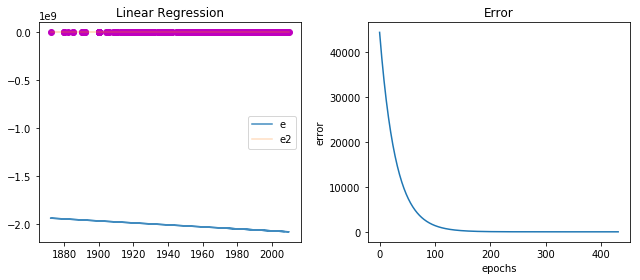

In [219]:
def normalize(X, y):
    X[:, 1] = (X[:, 1] - np.min(X[:, 1])) / (np.max(X[:, 1]) - np.min(X[:, 1]))
    y = (y - np.min(y)) / (np.max(y) - np.min(y))
    return X, y

def denormalize(X, y, theta):
    a, b, c, d = np.min(y), np.max(y) - np.min(y), np.min(X[:, 1]), np.max(X[:, 1]) - np.min(X[:, 1])
    theta_hat = np.array([b * theta[0] / d, b*theta[1] + a - c*b*theta[0]/d])
    return theta_hat

def linear_regression_mult_gd(X, y, epoch=10000, lr=.01):
    """Multivariate Linear Regression with Gradient Descent : Multidimensional."""
    total_expected_error = 0
    # Initialize the weights with random values
    W = np.array([0., 0.]) #np.random.uniform(size=X.shape[1])
    # We are just copying to presentation
    W_org = W.copy()
    errorlist = []
    epoch_steps = 0
    X, y = normalize(X, y)
    # Run for the epochs
    for k in range(epoch):
        # prediction
        # Yh = X.dot(W)
        # calculate the error
        # error = np.sum((Yh - y).dot(X))
        # sum all the errors used in early stop and for presentation
        total_error = error**2
        # calculate the gradient
        # gradient = np.sum((Yh - y).dot(X)) / X.shape[0]
        # adjust the weights using the learning rate and the gradient
        # W += -lr * gradient
        
        predictions = X.dot(W).flatten()

        errors_x1 = (predictions - y)
        errors_x2 = (predictions - y)

        W[0] += - lr * (1.0 / X.shape[0]) * errors_x1.sum()
        W[1] += - lr * (1.0 / X.shape[0]) * errors_x2.sum()
        
        # theta[0] -= alpha/x_nor.shape[0] * 2 * sum((theta[0] * x_nor + theta[1] - y_nor)*x_nor)
        # theta[1] -= alpha/x_nor.shape[0] * 2 * sum((theta[0] * x_nor + theta[1] - y_nor) )
        
        total_error = np.sum(predictions - y)**2
        # In case we need to stop iterating because the error is too low
        if np.abs(total_expected_error-total_error) < .0005:
            return W_org, W, total_error, errorlist, epoch_steps
        total_expected_error = total_error
        # Support vars
        errorlist.append(total_error)
        epoch_steps += 1
    return W_org, W, total_error, errorlist, epoch_steps

A = np.c_[np.ones(len(X_train)), X_train]
W_org, W, error, errorlist, epoch_steps = linear_regression_mult_gd(A.copy(), y_train.copy())
W = denormalize(A.copy(), y_train.copy(), W)
print(W)
e = W[0] + (X_train * W[1])
e2 = W_org[0] + (X_train * W_org[1])

plt.figure(figsize=(9, 4))
plt.subplot(1, 2, 1)
plt.title('Linear Regression')
plt.plot(X_train, y_train, 'mo')
plt.plot(X_train, e, alpha=.85, label='e')
plt.plot(X_train, e2, alpha=.25, label='e2')
plt.legend()
plt.subplot(1, 2, 2)
plt.title('Error')
plt.xlabel("epochs")
plt.ylabel("error")
plt.plot(range(epoch_steps), errorlist)
plt.tight_layout()
plt.show()

[1292.9321994637112, -2367050.346883682]


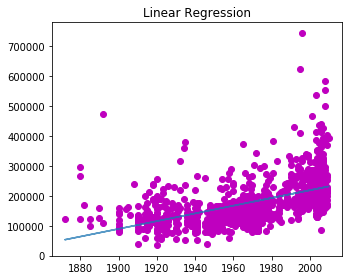

In [103]:
A = np.vstack([X_train, np.ones(len(X_train))]).T
reg = LinearRegression().fit(A, y_train)
print([reg.coef_[0], reg.intercept_])
e_sk_value = (reg.coef_ * A) + reg.intercept_

plt.figure(figsize=(5, 4))
plt.title('Linear Regression')
plt.plot(X_train, y_train, 'mo')
plt.plot(X_train, e_sk_value[:, 0], alpha=.75)
plt.tight_layout()
plt.show()


[ 1.29292507e+03 -2.36703640e+06]


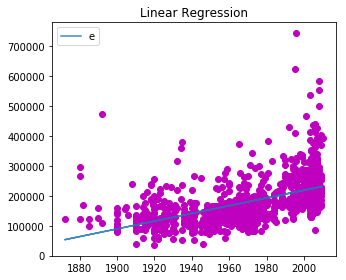

In [130]:
def gradient_descent(x_nor, y_nor, iters):
    theta = np.random.uniform(size=2)
    alpha = 1
    for t in range(iters):
        theta[0] -= alpha/x_nor.shape[0] * 2 * sum((theta[0] * x_nor + theta[1] - y_nor)*x_nor)
        theta[1] -= alpha/x_nor.shape[0] * 2 * sum((theta[0] * x_nor + theta[1] - y_nor) )
    return theta

def plot_fit(theta):
    plt.scatter(x_nor, y_nor, marker = 'x')
    plt.xlabel("Nomalized Temperature")
    plt.ylabel("Normalized Demand")
    xlim, ylim =(plt.gca().get_xlim(), plt.gca().get_ylim())
    plt.plot(xlim, [theta[0]*xlim[0]+theta[1], theta[0]*xlim[1]+theta[1]], 'C1')
    plt.xlim(xlim)
    plt.ylim(ylim)

X_nor, y_nor = normalize(A.copy(), y_train.copy())
Wg = gradient_descent(X_nor[:, 1], y_nor, 50)
Wg = denormalize(A.copy(), y_train.copy(), Wg)
print(Wg)

e = Wg[1] + (X_train * Wg[0])

plt.figure(figsize=(9, 4))
plt.subplot(1, 2, 1)
plt.title('Linear Regression')
plt.plot(X_train, y_train, 'mo')
plt.plot(X_train, e, alpha=.85, label='e')
plt.legend()
plt.tight_layout()
plt.show()